# Exploring Variable Relationships
### Table of Contents:

01. Libraries Import
02. Data Import
03. Exploring Relationships
- 3.1 Correlations
- 3.2 Scatterplots
- 3.3 Pair Plots
- 3.4 Categorical Plots
04. Revisit Questions
05. Potential Hypotheses

## 01. Libraries Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Checking the matplotlib version

matplotlib.__version__

'3.3.4'

In [3]:
# Adjusting the settings so that charts created are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

## 02. Data Import

In [5]:
# Create a string path

path = r'C:\Users\rasmu\Documents\CareerFoundry\A6 National Parks Analysis'

In [6]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepd Data', 'NatlParks_clean.csv'))

In [7]:
# Checking that import was successful

df.shape

(7560, 15)

In [8]:
df.columns

Index(['Unnamed: 0', 'ParkName', 'UnitCode', 'Region', 'State', 'Year',
       'Month', 'RecVisits', 'NonRecVisits', 'RecHours', 'NonRecHours',
       'TentCampers', 'RVCampers', 'Backcountry', 'RecHrsRange'],
      dtype='object')

In [9]:
df.head()

,Unnamed: 0,ParkName,UnitCode,Region,State,Year,Month,RecVisits,NonRecVisits,RecHours,NonRecHours,TentCampers,RVCampers,Backcountry,RecHrsRange
0,0,Acadia NP,ACAD,Northeast,ME,2012,1,11930,600,78738,600,0,0,0,Low usage
1,1,Acadia NP,ACAD,Northeast,ME,2012,2,12388,600,81758,600,0,0,0,Low usage
2,2,Acadia NP,ACAD,Northeast,ME,2012,3,22684,600,149716,600,0,0,0,Usual usage
3,3,Acadia NP,ACAD,Northeast,ME,2012,4,59471,600,344929,600,1338,174,0,Usual usage
4,4,Acadia NP,ACAD,Northeast,ME,2012,5,157406,7500,894751,7500,7800,1467,29,High usage


In [10]:
# Need to drop the 'Unnamed: 0' column 

df = df.drop(columns = ['Unnamed: 0'])

In [11]:
# Rechecking columns

df.columns

Index(['ParkName', 'UnitCode', 'Region', 'State', 'Year', 'Month', 'RecVisits',
       'NonRecVisits', 'RecHours', 'NonRecHours', 'TentCampers', 'RVCampers',
       'Backcountry', 'RecHrsRange'],
      dtype='object')

In [12]:
df.shape

(7560, 14)

In [13]:
# Renaming some columns whose names are too long and can be as understandable when shortened

df.rename(columns = {'RecreationVisits' : 'RecVisits', 'NonRecreationVisits': 'NonRecVisits', 'RecreationHours': 'RecHours', 
                    'NonRecreationHours': 'NonRecHours'}, inplace = True)

In [14]:
# Final Check of columns

df.columns

Index(['ParkName', 'UnitCode', 'Region', 'State', 'Year', 'Month', 'RecVisits',
       'NonRecVisits', 'RecHours', 'NonRecHours', 'TentCampers', 'RVCampers',
       'Backcountry', 'RecHrsRange'],
      dtype='object')

In [15]:
# DataType Check

df.dtypes

ParkName        object
UnitCode        object
Region          object
State           object
Year             int64
Month            int64
RecVisits        int64
NonRecVisits     int64
RecHours         int64
NonRecHours      int64
TentCampers      int64
RVCampers        int64
Backcountry      int64
RecHrsRange     object
dtype: object

In [16]:
# Readjusting 'Year' & 'Month' datatypes as they're supposed to be categorical

df['Year'] = df['Year'].astype('str')

In [17]:
df['Month'] = df['Month'].astype('str')

In [18]:
# Rechecking DataTypes

df.dtypes

ParkName        object
UnitCode        object
Region          object
State           object
Year            object
Month           object
RecVisits        int64
NonRecVisits     int64
RecHours         int64
NonRecHours      int64
TentCampers      int64
RVCampers        int64
Backcountry      int64
RecHrsRange     object
dtype: object

## 03. Exploring Relationships

### 3.1 Correlations:

In [19]:
# Creating a correlation matrix (using pandas)

df.corr()

,RecVisits,NonRecVisits,RecHours,NonRecHours,TentCampers,RVCampers,Backcountry
RecVisits,1.000000,0.607908,0.843677,0.607908,0.603888,0.650366,0.547275
NonRecVisits,0.607908,1.000000,0.410549,1.000000,0.154442,0.232808,0.163403
RecHours,0.843677,0.410549,1.000000,0.410549,0.695441,0.718255,0.680730
NonRecHours,0.607908,1.000000,0.410549,1.000000,0.154442,0.232808,0.163403
TentCampers,0.603888,0.154442,0.695441,0.154442,1.000000,0.878966,0.656590
RVCampers,0.650366,0.232808,0.718255,0.232808,0.878966,1.000000,0.589349
Backcountry,0.547275,0.163403,0.680730,0.163403,0.656590,0.589349,1.000000


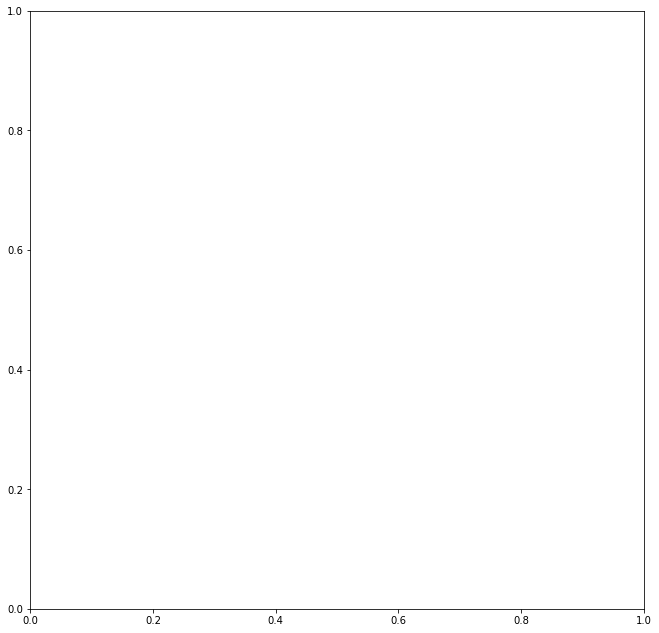

In [20]:
# Creating an empty subplot with matplotlib.

f,ax = plt.subplots(figsize=(11,11))

In [21]:
# Creating a correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the plots defined above.

corr = sns.heatmap(df.corr(), annot = True, ax = ax) 

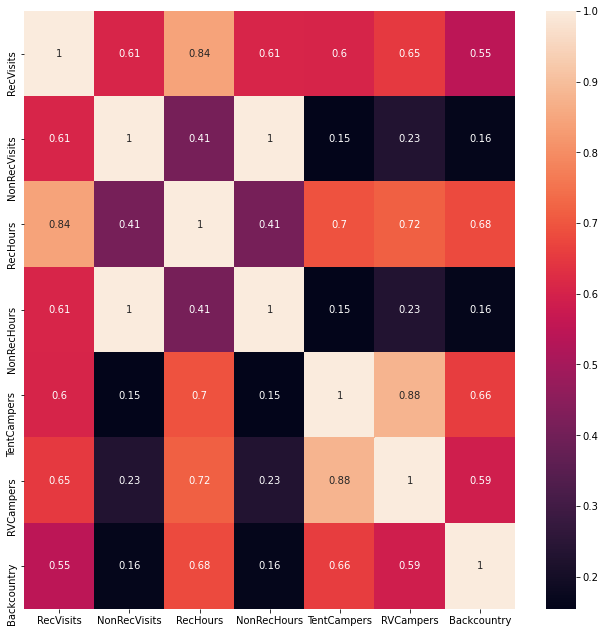

In [22]:
corr.figure

In [24]:
# Exporting Correlation Figure

corr.figure.savefig(os.path.join(path, '04 Analysis', 'heatmap.png'))

#### Correlation observations

I was expecting to find Recreation Visits to be the strongest coefficient of all the variables. While it is still strong, Recreation Hours has the most strong relationships by a hair.

Recreation Hours & RV Campers have the strongest correlation at .72 (Recreation Hours & Visits are .84, but you can't have the hours without the visits, so I'm more shocked that it's not even closer to 1.0. I consider that relationship to not be relevant to the overall insight), followed by the other camping variables, which are both over .68 as well.

### 3.2 Scatterplots

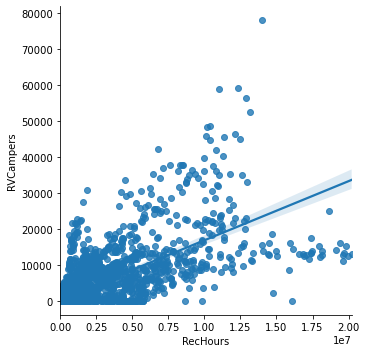

In [25]:
# Creating a scatterplot for the "Recreation Hours" and "Consessions Lodging" columns in seaborn

sns.lmplot(x = 'RecHours', y = 'RVCampers', data = df)

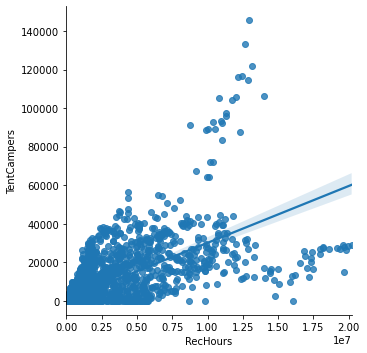

In [26]:
# Creating a scatterplot for the "Recreation Hours" and "RVCampers" columns in seaborn

sns.lmplot(x = 'RecHours', y = 'TentCampers', data = df)

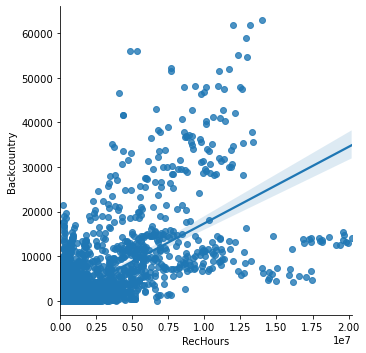

In [27]:
# Creating a scatterplot for the "Recreation Hours" and "Backcountry" columns in seaborn

sns.lmplot(x = 'RecHours', y = 'Backcountry', data = df)

#### Scatterplots observations

As expected, there's a positive trend line in all of the scatterplots. I'm also assuming that the majority of the points near 0 for camper related variables are because of COVID-19 protocols in 2020 that prohibited camping. 

There's a couple of outliers in RV Campers, Tent Campers, & Backcountry that I'd be interested in knowing more about, but I'm wondering if they are at parks that are larger and can allow for the higher numbers. 

Ultimately, the confirmation of the positive correlation between Recreation Hours and these variables is not a surprise.

### 3.3 Pair Plots

In [28]:
# Making a subset that focuses on the variables of note

sub = df[['RecVisits', 'NonRecVisits', 'RecHours', 'NonRecHours', 'TentCampers', 'RVCampers', 'Backcountry']]

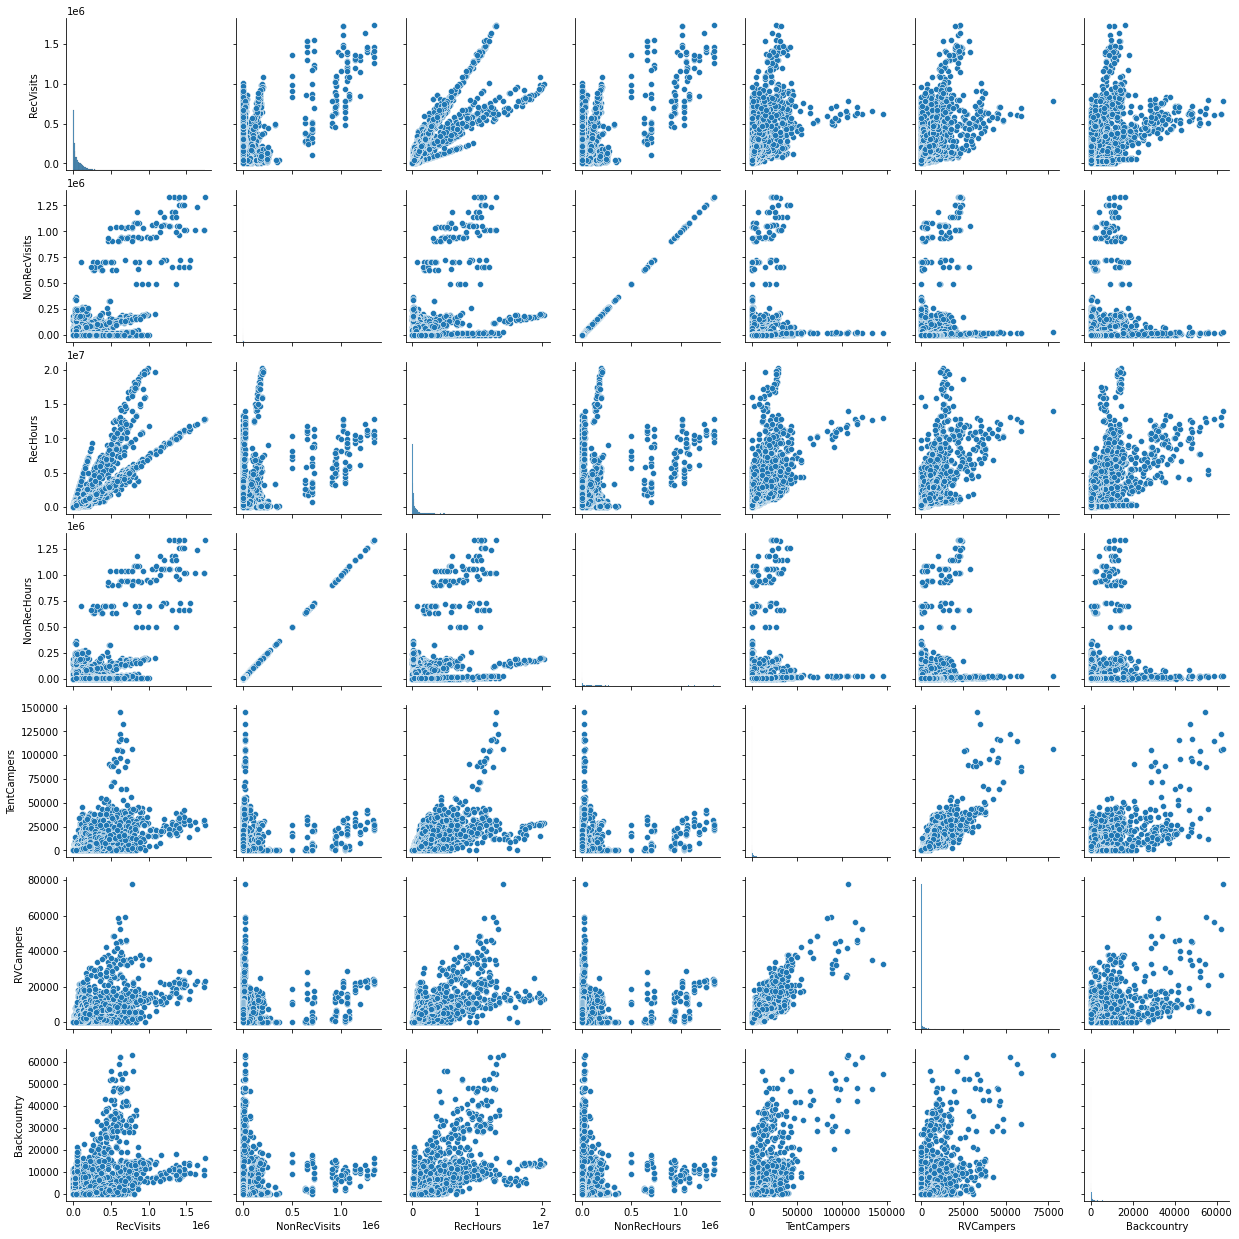

In [29]:
# Creating the pair plot 

g = sns.pairplot(sub)

#### Pair Plots observations

There's a lot of positive correlation trends between most of the variables. Recreation Visits and Backcountry seem to have a unique relationship that could be worth looking into deeper.

The near perfect correlation lines in RecHours-RecVisits & NonRecHours-NonRecVisits supports my point previously that those relationships aren't worth exploring. You can't have the hours without the visits.

### 3.4 Categorical Plots

C:\Users\rasmu\Downloads\AnacondaNew\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RecHours', ylabel='Density'>

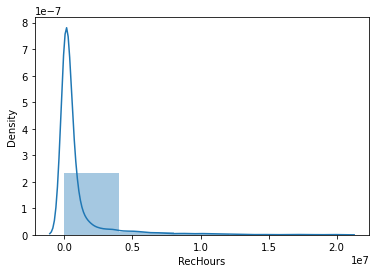

In [30]:
# Using a histogram to visualize the distribution of recreation hours to help determine categories for hour ranges

sns.distplot(df['RecHours'], bins = 5)

In [31]:
# Checking statistics on Recreation Hours to better help make categories

df['RecHours'].describe()

count    7.560000e+03
mean     9.033467e+05
std      2.129197e+06
min      0.000000e+00
25%      4.858450e+04
50%      1.779150e+05
75%      6.485528e+05
max      2.021239e+07
Name: RecHours, dtype: float64

In [32]:
# Creating categories for the categorical plot

df.loc[df['RecHours'] < 100000, 'RecHrsRange'] = 'Low usage'

In [33]:
df.loc[(df['RecHours'] >= 100000) & (df['RecHours'] < 500000), 'RecHrsRange'] = 'Usual usage'

In [34]:
df.loc[df['RecHours'] > 500000, 'RecHrsRange'] = 'High usage'

In [35]:
df['RecHrsRange'].value_counts(dropna = False)

Low usage      2888
Usual usage    2440
High usage     2232
Name: RecHrsRange, dtype: int64

KeyboardInterrupt: 

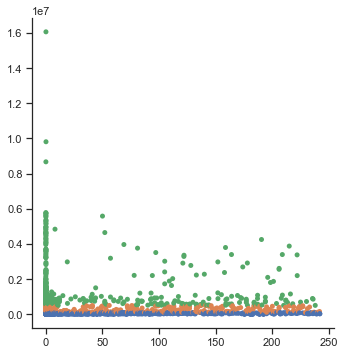

In [36]:
# Creating a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="RVCampers", y="RecHours", hue="RecHrsRange", data=df)

#### Categorical Plot observations

The kernel was stopped as it was taking too long to load/create. However, it looks like some layers were already starting to come together. 

## 04. Revisit Questions

### 4.1 Visitation

- Which national parks and lands have the highest visitation, and which have the lowest?

This question hasn't been answered yet, but can easily be done. 

- When looking at the regions, what does a timeline look like for visitation numbers? Are there different peak and off-times based on geographical locations?

This seems like it would require some time series focus. I don't this initial insight helps this questions.

### 4.2 Tourism Advertising

- If looking to recommend best travel packages and deals, when is the best time to visit national parks and lands?

This is another time series related answer, but it will be the areas that have a good balance, maybe "usual usage", of attendance at the parks/lands.

- To increase overall visitation across the national parks, which ones could use more advertising efforts to boost their numbers?

The ones with the lowest recreation hours will be the ones worth focusing on. However, it'll be worth noting that some parks don't allow for camping/RVing, like in Alaska, and so it'll be worth keeping an eye on.

### 4.3 Staffing Concerns

- To best address staffing needs for parks, when are the peak times and off-times for our most popular parks and lands?

This also seems to be more of a time series question. However, in order to find the most popular parks, we should probably look at recreation hours instead of recreation visits. That will in turn give us a better picture of overall usage and amount of campers/RVers/consessioner usage.

### 4.4 New Questions

- When is the better time for camping/lodging? Is it better to be in "low usage" or "usual usage" recreation hours?

- Are there certain regions better to focus on at different times of the year?

# 05. Potential Hypotheses

1 - The best time to visit National Parks/Lands will be when they traditionally have "usual usage" in recreation hours. 

2 - It'll be worth the effort of creating trips to make sure to group multiple parks based on mutual usage levels.

# 06. Export Data

In [38]:
# Export df to Prepd Data folder after making the column heading changes.

df.to_csv(os.path.join(path, '02 Data', 'Prepd Data', 'NatlParks_clean.csv'))